<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [100]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [101]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [102]:
from pandas import to_datetime

# 데이터 샘플 개수 파악 
print(df.shape)

# 기준 날짜 데이터 
compare_date = to_datetime('2015-01-01')

# date를 datetime 형으로 변환, 새로운 컬럼 생성
df['new_date'] = df['date'].apply(to_datetime)

# test data
test = df[df['new_date']>=compare_date]

# train data 
train = df.drop(test.index)

print(test.shape, train.shape)

(21613, 21)
(6980, 22) (14633, 22)


### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 다중선형회귀 모델 객체 생성
model = LinearRegression()

feature = ['sqft_living','bathrooms']

# train & test data 
X_train = train[feature]
X_test = test[feature]

target = 'price'
y_train = train[target]
y_test = test[target]

# model fit 
model.fit(X_train,y_train)

# train data predict
y_tpred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_tpred)
print(f'훈련 에러: {mae:.2f}')  #mae:.2f 소수점 둘째자리까지 표현할 때 이렇게!

# test data predict
y_epred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_epred)
print(f'테스트 에러: {mae:.2f}')

훈련 에러: 170777.34
테스트 에러: 179252.53


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [104]:
# 회귀식 만들기

b0 = model.intercept_
b1,b2 = model.coef_ # b1 - sqft_living , b2 - bathroom

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

y = -50244 + 286x₁ + -5159x₂


### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [105]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

# train data에 평가 지표 사용
print('\n[train data]\n')
print(f'MSE: {mean_squared_error(y_train,y_tpred):.03f},RMSE: {mean_squared_error(y_train,y_tpred)**0.5:.03f}\
,MAE:{mean_absolute_error(y_train,y_tpred):.03f},R^2:{r2_score(y_train,y_tpred):.03f}') 

print('\n[test data]\n')
print(f'MSE: {mean_squared_error(y_test,y_epred):.03f},RMSE: {mean_squared_error(y_test,y_epred)**0.5:.03f}\
,MAE:{mean_absolute_error(y_test,y_epred):.03f},R^2:{r2_score(y_test,y_epred):.03f}') 


[train data]

MSE: 67099053309.954,RMSE: 259034.850,MAE:170777.342,R^2:0.508

[test data]

MSE: 71083994178.757,RMSE: 266615.818,MAE:179252.526,R^2:0.460


## 🔥도전과제

### 5) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)
- EDA를 자세히 진행하세요
- 특성공학 과정을 자세히 기술하세요
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
- 만들어진 회귀계수를 사용해 모델을 설명하세요.
- 모델이 과적합인지/과소적합인지 설명하세요.
- 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

In [106]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

# EDA

In [107]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [109]:
df.shape

(21613, 21)

In [110]:
df.describe().T.style.bar(subset=['mean'],color='gray').background_gradient(subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


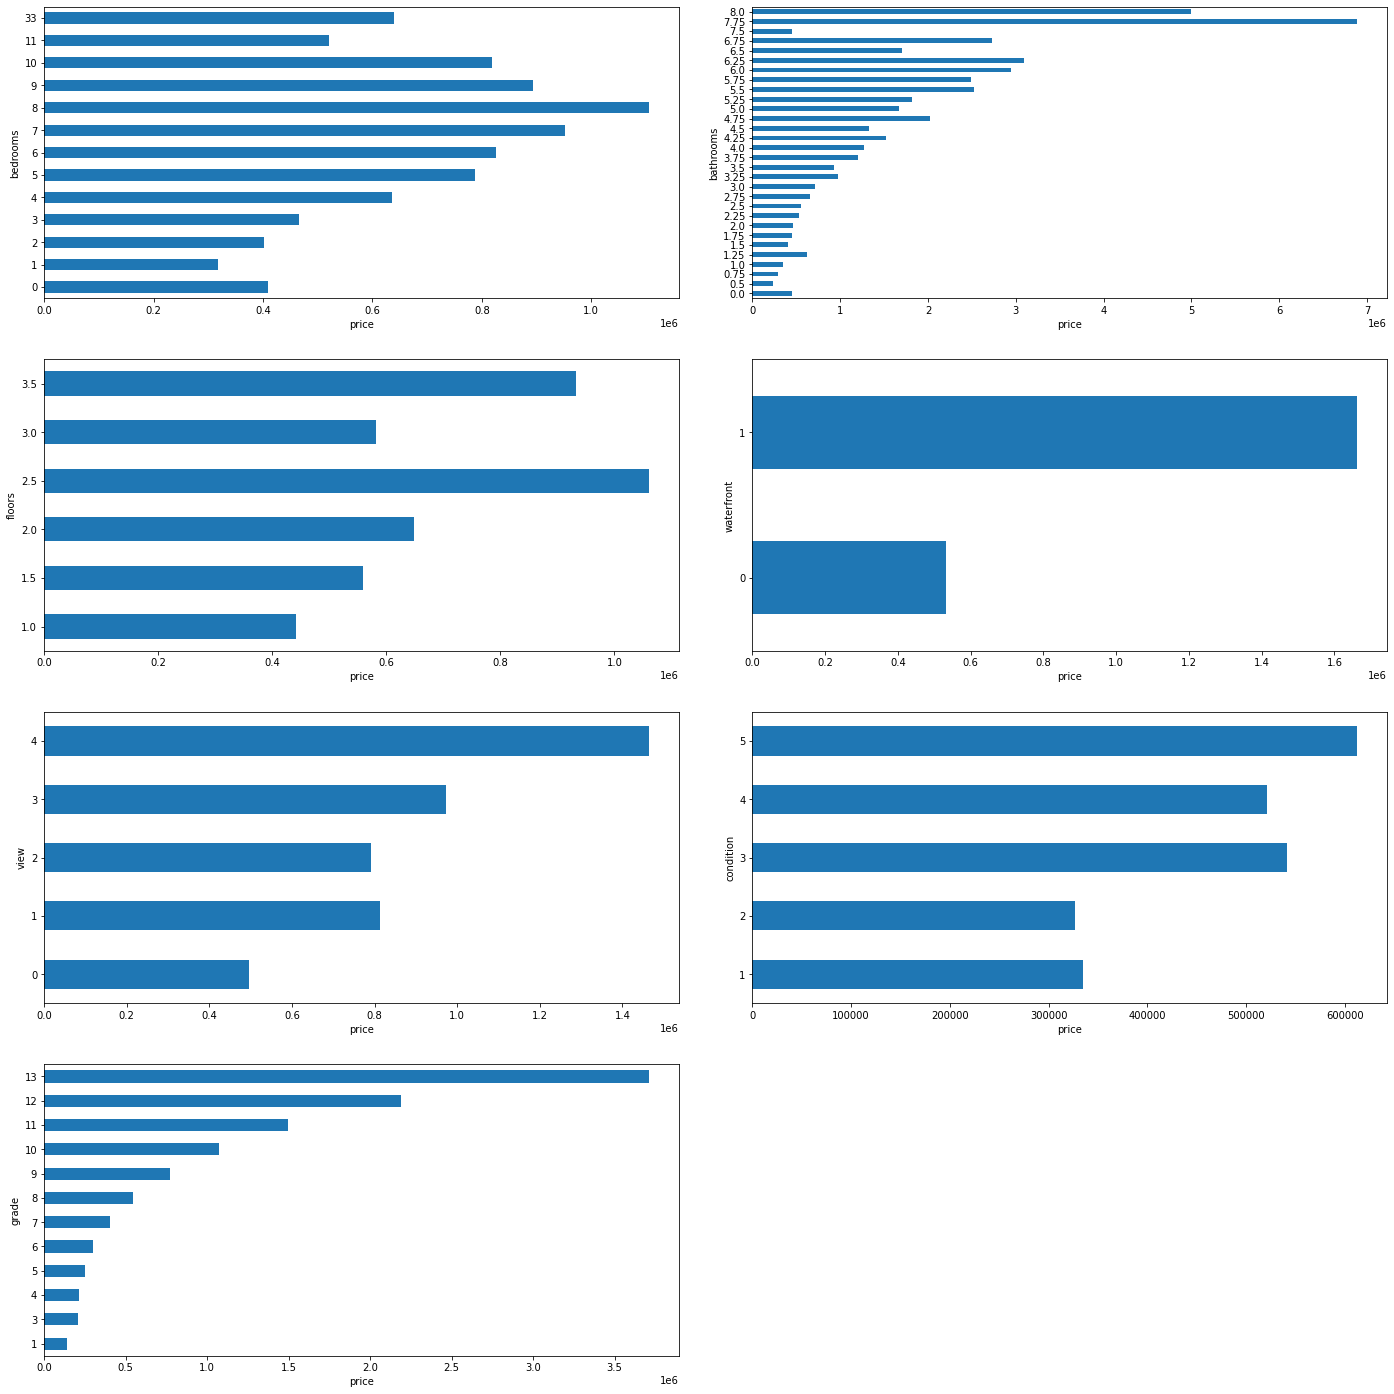

In [111]:
import matplotlib.pyplot as plt
from tqdm import notebook
import numpy as np

#Dividing data for plotting
plot_data = df.drop(
    ['id', 'date', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)

def groupBarPlotter(dataset):
    """
    This function will create bar plot for each column in the dataset with price column
    """
    fig = plt.figure(figsize=(20, 20))
    for i in notebook.tqdm(range(len(dataset.columns)), desc = 'Generating Group Plots'):
        if not dataset.columns[i] == 'price':
            groups = dataset.groupby(dataset.columns[i])['price'].mean()
            fig.add_subplot(np.ceil(len(dataset.columns)/2), 2, i)
            plt.xlabel('price')
            groups.plot.barh()
            fig.tight_layout(pad=3.0)

groupBarPlotter(plot_data)

# Feature Engineering

In [112]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [113]:
# ID를 index로 변경 
df = df.set_index('id') # set_index('컬럼명') : 컬럼명을 index로 바꿔주는 함수  

# date의 타입을 datetime으로 변경
df['date'] = pd.to_datetime(df['date'])

# price, bathrooms, floors를 int형으로 변경 -> float형이지만 실제로 float형일 필요가 없는 컬럼의 데이터
df.price = df.price.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.floors = df.floors.astype(int)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [114]:
# 새로운 feature 생성 - house_age, renovated
# house_age = date - yr_built 
df['house_age'] = df.date.dt.year - df.yr_built

# 만약, yr_renovated data가 0이면 0으로, 0이 아니면 1로 바꾼 renovated 컬럼 생성 
df['renovated'] = df.yr_renovated.apply(lambda yr: 0 if yr == 0 else 1)

# drop date, yr_built, yr_renovated 
df = df.drop(['date','yr_built','yr_renovated'],axis = 1)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.51,-122.26,1340,5650,59,0
6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.72,-122.32,1690,7639,63,1
5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,98028,47.74,-122.23,2720,8062,82,0
2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.52,-122.39,1360,5000,49,0
1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.62,-122.05,1800,7503,28,0


In [115]:
pd.set_option('precision', 2) # set_option의 option 'max_rows'-행 , 'precision' - 소수점
print(df.describe())

          price  bedrooms  bathrooms  ...  sqft_lot15  house_age  renovated
count  2.16e+04  21613.00   21613.00  ...    21613.00   21613.00   21613.00
mean   5.40e+05      3.37       1.75  ...    12768.46      43.32       0.04
std    3.67e+05      0.93       0.73  ...    27304.18      29.38       0.20
min    7.50e+04      0.00       0.00  ...      651.00      -1.00       0.00
25%    3.22e+05      3.00       1.00  ...     5100.00      18.00       0.00
50%    4.50e+05      3.00       2.00  ...     7620.00      40.00       0.00
75%    6.45e+05      4.00       2.00  ...    10083.00      63.00       0.00
max    7.70e+06     33.00       8.00  ...   871200.00     115.00       1.00

[8 rows x 19 columns]


In [116]:
# price 기준, 상관계수 top 10 설정
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'price').index
columns
# 새로운 특성 house_age와 renovated를 만들었지만 price와 상관관계가 높지 않아 top 10에 선정되지 못했다.

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

In [117]:
# test & train data 
from sklearn.model_selection import train_test_split

X = df[columns]
Y = X['price'].values
X = X.drop('price', axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [118]:
# model fit 
model.fit(X_train,Y_train)

# train data predict
y_tpred = model.predict(X_train)

# test data predict
y_epred = model.predict(X_test)

In [119]:
# train data에 평가 지표 사용
print('\n[train data]\n')
print(f'MSE: {mean_squared_error(Y_train,y_tpred):.03f},RMSE: {mean_squared_error(Y_train,y_tpred)**0.5:.03f}\
,MAE:{mean_absolute_error(Y_train,y_tpred):.03f},R^2:{r2_score(Y_train,y_tpred):.03f}') 

# test data에 평가 지표 사용
print('\n[test data]\n')
print(f'MSE: {mean_squared_error(Y_test,y_epred):.03f},RMSE: {mean_squared_error(Y_test,y_epred)**0.5:.03f}\
,MAE:{mean_absolute_error(Y_test,y_epred):.03f},R^2:{r2_score(Y_test,y_epred):.03f}') 

## 아래의 지표를 보아, train data에 과적합된 것을 알 수 있다. 모든 지표가 train data일 때가 더 좋기 때문이다.


[train data]

MSE: 47024711054.499,RMSE: 216851.818,MAE:135646.103,R^2:0.640

[test data]

MSE: 54536878769.594,RMSE: 233531.323,MAE:140081.693,R^2:0.639


In [127]:
# 값이 가장 큰 회귀계수의 feature 확인
columns[model.coef_.argmax()]

#아래의 결과를 보아, bedrooms값이 target date(price)에 가장 영향력이 높은 것을 알 수 있다.

'bedrooms'

In [145]:
# dict 형태로 표현
column_coef = dict()
for i,j in zip(columns,model.coef_):
  column_coef[i] = j

# value 값을 기준으로 정렬
sorted(column_coef.items(),key = (lambda x:x[1]),reverse = True)

# target data에 영향을 주는 feature의 순위를 아래의 결과로 엿 볼수 있었다.

[('bedrooms', 660593.7031661794),
 ('bathrooms', 94501.5564790977),
 ('sqft_living', 70843.0341281279),
 ('sqft_living15', 17401.705762142486),
 ('price', 126.73178338661333),
 ('view', 69.78297817134808),
 ('grade', 56.94880522126914),
 ('sqft_above', 6.592076905159047),
 ('sqft_basement', -28893.082634074766)]

In [96]:
# house_age와 renovated가 price와 상관계수가 낮지만 이용해보겠다.
X = df[['house_age','price']]
Y = X['price'].values
X = X.drop('price', axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

# model fit 
model.fit(X_train,Y_train)

# train data predict
y_tpred = model.predict(X_train)

# test data predict
y_epred = model.predict(X_test)

In [97]:
# train data에 평가 지표 사용
print('\n[train data]\n')
print(f'MSE: {mean_squared_error(Y_train,y_tpred):.03f},RMSE: {mean_squared_error(Y_train,y_tpred)**0.5:.03f}\
,MAE:{mean_absolute_error(Y_train,y_tpred):.03f},R^2:{r2_score(Y_train,y_tpred):.03f}') 

# test data에 평가 지표 사용
print('\n[test data]\n')
print(f'MSE: {mean_squared_error(Y_test,y_epred):.03f},RMSE: {mean_squared_error(Y_test,y_epred)**0.5:.03f}\
,MAE:{mean_absolute_error(Y_test,y_epred):.03f},R^2:{r2_score(Y_test,y_epred):.03f}') 

## 아래의 지표를 보아, house_age의 특성은 target 특성을 예측하기에 전혀 유효하지 않았다. 과소적합, 과적합을 따질수가 없을만큼 쓸모없는 결과인거 같다.


[train data]

MSE: 130335914917.909,RMSE: 361020.657,MAE:231770.611,R^2:0.002

[test data]

MSE: 150625436499.703,RMSE: 388104.930,MAE:239581.287,R^2:0.004


In [98]:
# house_age와 renovated가 price와 상관계수가 낮지만 이용해보겠다.
X = df[['renovated','price']]
Y = X['price'].values
X = X.drop('price', axis = 1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

# model fit 
model.fit(X_train,Y_train)

# train data predict
y_tpred = model.predict(X_train)

# test data predict
y_epred = model.predict(X_test)

# train data에 평가 지표 사용
print('\n[train data]\n')
print(f'MSE: {mean_squared_error(Y_train,y_tpred):.03f},RMSE: {mean_squared_error(Y_train,y_tpred)**0.5:.03f}\
,MAE:{mean_absolute_error(Y_train,y_tpred):.03f},R^2:{r2_score(Y_train,y_tpred):.03f}') 

# test data에 평가 지표 사용
print('\n[test data]\n')
print(f'MSE: {mean_squared_error(Y_test,y_epred):.03f},RMSE: {mean_squared_error(Y_test,y_epred)**0.5:.03f}\
,MAE:{mean_absolute_error(Y_test,y_epred):.03f},R^2:{r2_score(Y_test,y_epred):.03f}') 

## 아래의 지표를 보아, renovated의 특성도 target 특성을 예측하기에 전혀 유효하지 않았다. 과적합, 과소적합이냐를 굳이 따져야 한다면 과적합되었다고 볼 수 있다.


[train data]

MSE: 128527206418.635,RMSE: 358506.913,MAE:230003.670,R^2:0.016

[test data]

MSE: 149079151677.287,RMSE: 386107.694,MAE:238184.319,R^2:0.014


## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)

In [99]:
#